# Plots

## Libraries

In [1]:
from utils import *
from load_data import *
from process_data import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress
import seaborn as sns
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Training Data

In [175]:
# Load the Excel file
path = "Training.xlsx"
df = pd.read_excel(path)

## Target Variables

### Análisis General

In [176]:
# Filter dataset for "Análisis General"
ageneral_df = df[df["Type"] == "analisis_general"]

In [177]:
ageneral_df.head()

,Run_ID,Data,Type,Balance,Embedding_Name,Embedding_Size,Model,Cross_Validation,Best_params,Accuracy_Global,...,Desprestigiar Deportista Autora_f1-score,Desprestigiar Deportista Autora_support,Sexualización / Objetivización_precision,Sexualización / Objetivización_recall,Sexualización / Objetivización_f1-score,Sexualización / Objetivización_support,Estereotipos de Género_precision,Estereotipos de Género_recall,Estereotipos de Género_f1-score,Estereotipos de Género_support
275,4d47cf4f-8dae-49bd-b30d-6b65141e07bf,data/BBDD_SeAcabo.csv,analisis_general,NaN,fasttext,100,random_forest,3,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.797348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,8585f4ac-cb28-4a5d-b9b5-152ab307c852,data/BBDD_SeAcabo.csv,analisis_general,NaN,fasttext,100,random_forest,5,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...",0.795455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,e7b71f3e-358e-4744-b996-0f9b8ca784a3,data/BBDD_SeAcabo.csv,analisis_general,NaN,fasttext,100,logistic_regression,3,"{'C': 100, 'max_iter': 200, 'penalty': 'l1', '...",0.804924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,ab33e703-dab9-4ae9-b06f-912b77578ef3,data/BBDD_SeAcabo.csv,analisis_general,NaN,fasttext,100,logistic_regression,5,"{'C': 100, 'max_iter': 100, 'penalty': 'l1', '...",0.804924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,03998a41-51ca-4bbe-ad27-684899b5bd36,data/BBDD_SeAcabo.csv,analisis_general,downsampling,fasttext,100,random_forest,3,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.507042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# Convert 'Timestamp' column to datetime if it's not already
ageneral_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by 'Timestamp' if needed
ageneral_df.sort_values('Timestamp', inplace=True)

# Resetting the index to ensure it's sequential
ageneral_df.reset_index(drop=True, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\781285989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\781285989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df.sort_values('Timestamp', inplace=True)


In [179]:
# Create a numerical "time" column for regression
ageneral_df['Time'] = np.arange(len(ageneral_df))

# Compute the regression
slope, intercept, r_value, p_value, std_err = linregress(ageneral_df['Time'], ageneral_df['weighted avg_f1-score'])
ageneral_df['Trend'] = intercept + slope * ageneral_df['Time']

C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\3644270318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df['Time'] = np.arange(len(ageneral_df))
C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\3644270318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageneral_df['Trend'] = intercept + slope * ageneral_df['Time']


In [180]:
# List of specific dates for vertical lines
specific_dates = ['2024-02-12 17:54:34', '2024-02-27 21:00:06', '2024-03-13 09:06:22', '2024-03-31 11:31:30', '2024-04-03 12:31:11', '2024-04-13 11:48:49', '2024-04-24 19:00:45', '2024-04-25 19:00:51', '2024-04-25 22:18:27', '2024-05-03 13:46:23']
specific_dates = pd.to_datetime(specific_dates)  # Convert to datetime if not already

# Find the indices of the specific dates in the DataFrame
specific_indices = ageneral_df[ageneral_df['Timestamp'].isin(specific_dates)].index.tolist()
specific_indices

[0, 4, 88, 94, 103, 125, 135, 160, 184, 210]

#### F1 Score

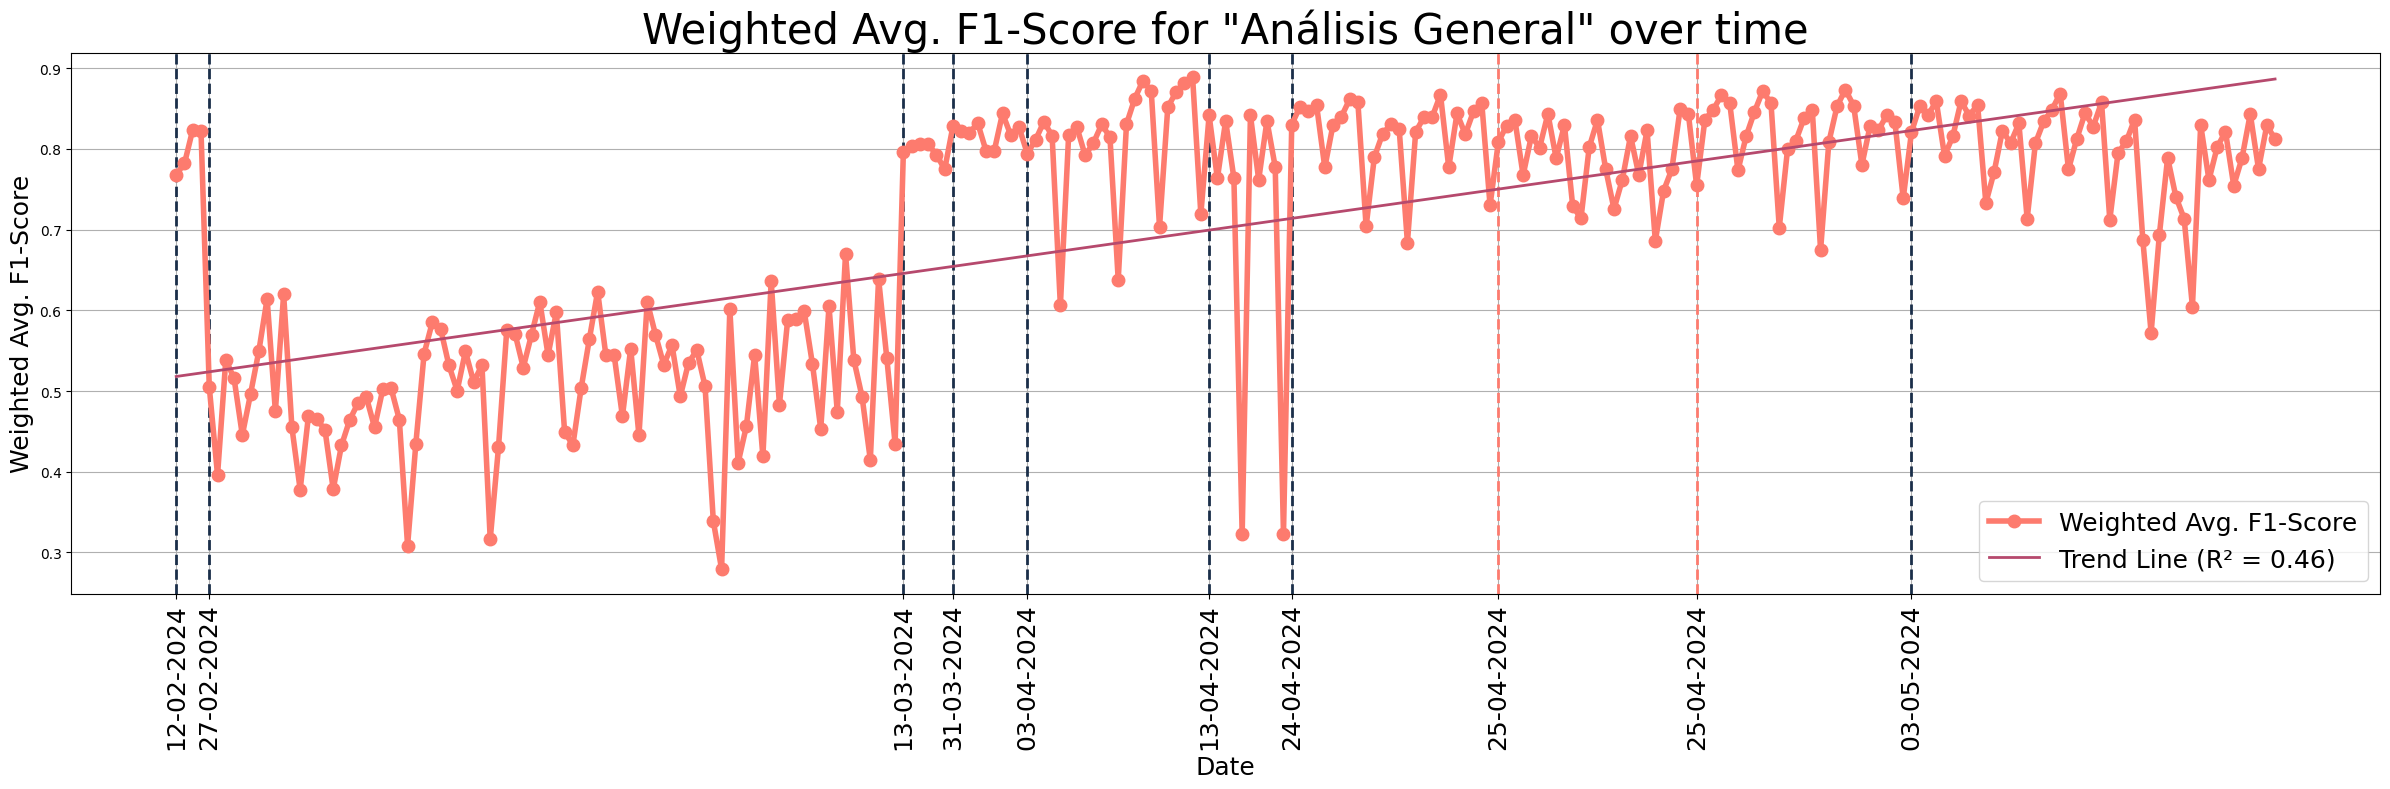

In [181]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df.index, ageneral_df['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#fd7b6e', label='Weighted Avg. F1-Score')


# Plotting the trend line
plt.plot(ageneral_df.index, ageneral_df['Trend'], linewidth=2, color='#b6496d', linestyle='-', label=f'Trend Line (R² = {r_value**2:.2f})')


plt.legend(fontsize=18)


# Setting labels and title
plt.title('Weighted Avg. F1-Score for "Análisis General" over time', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)




# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


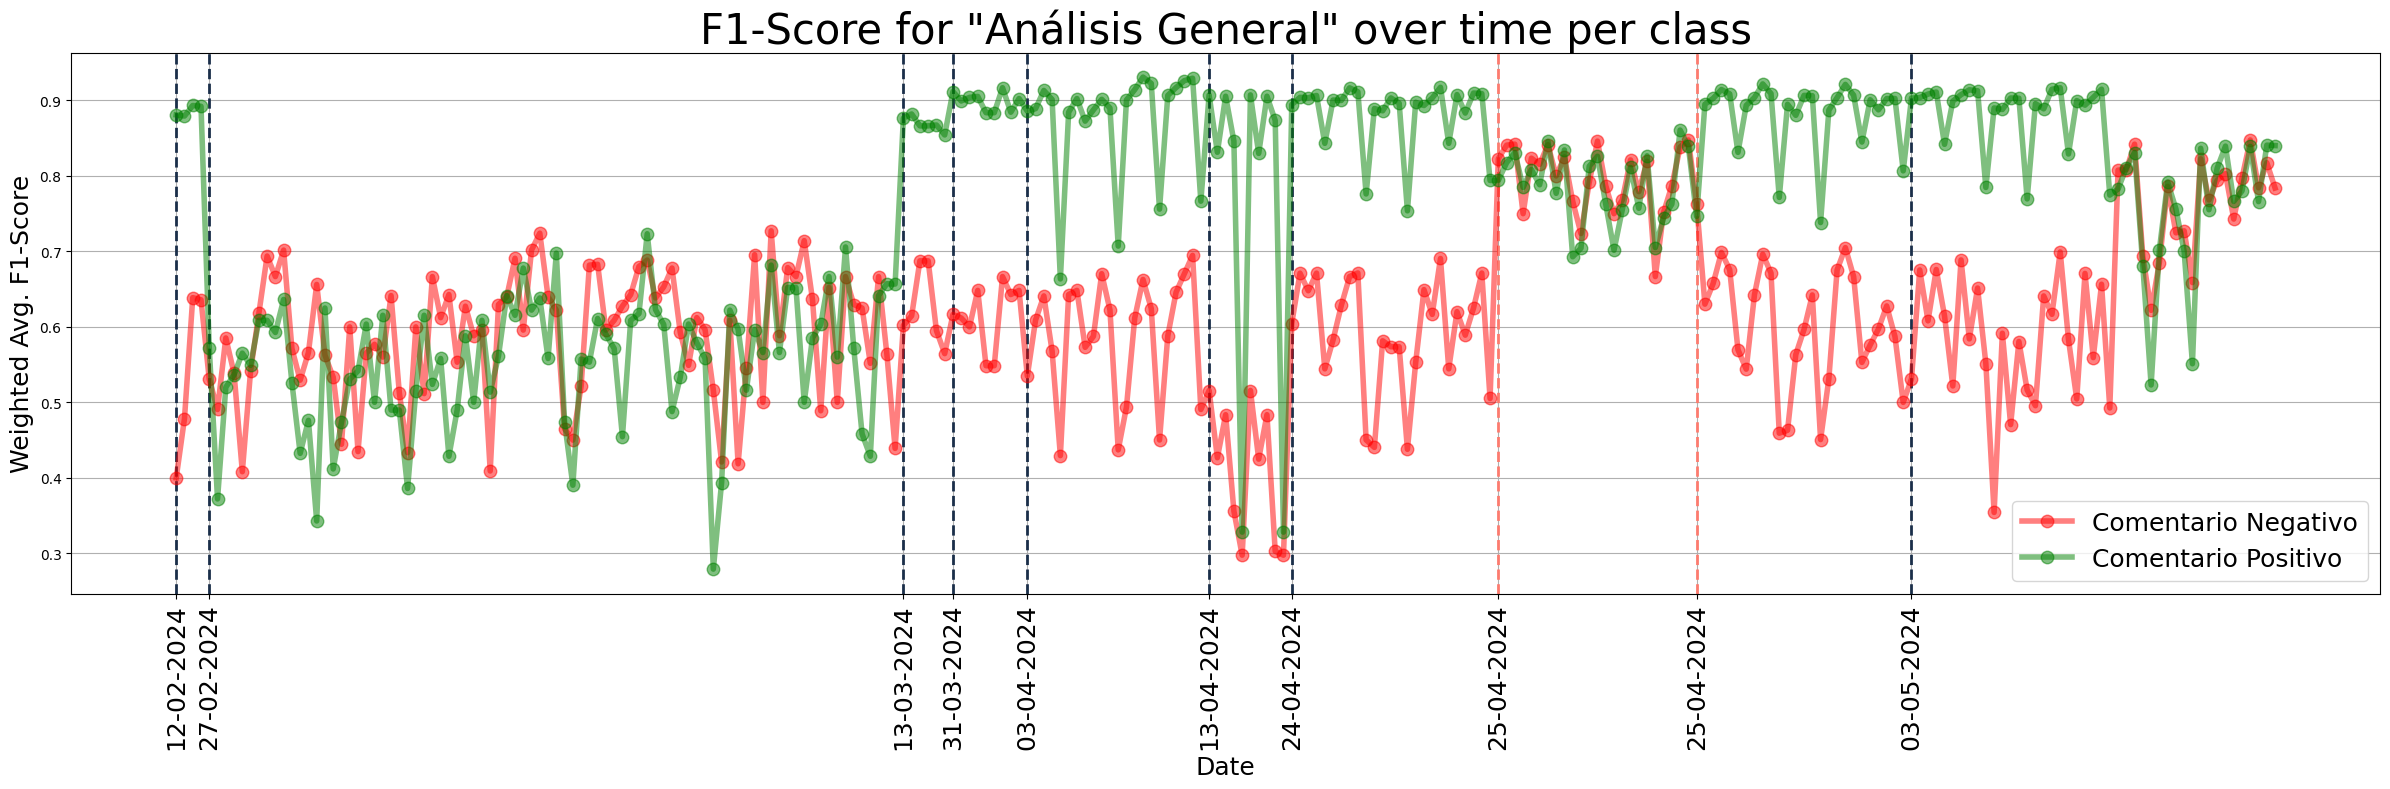

In [182]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df.index, ageneral_df['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='red', alpha=0.5, label='Comentario Negativo')
plt.plot(ageneral_df.index, ageneral_df['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='green', alpha=0.5, label='Comentario Positivo')
#plt.plot(ageneral_df.index, ageneral_df['Comentario Neutro_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='gray', alpha=0.2, label='Comentario Neutro')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Análisis General" over time per class', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)




# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#### Balance

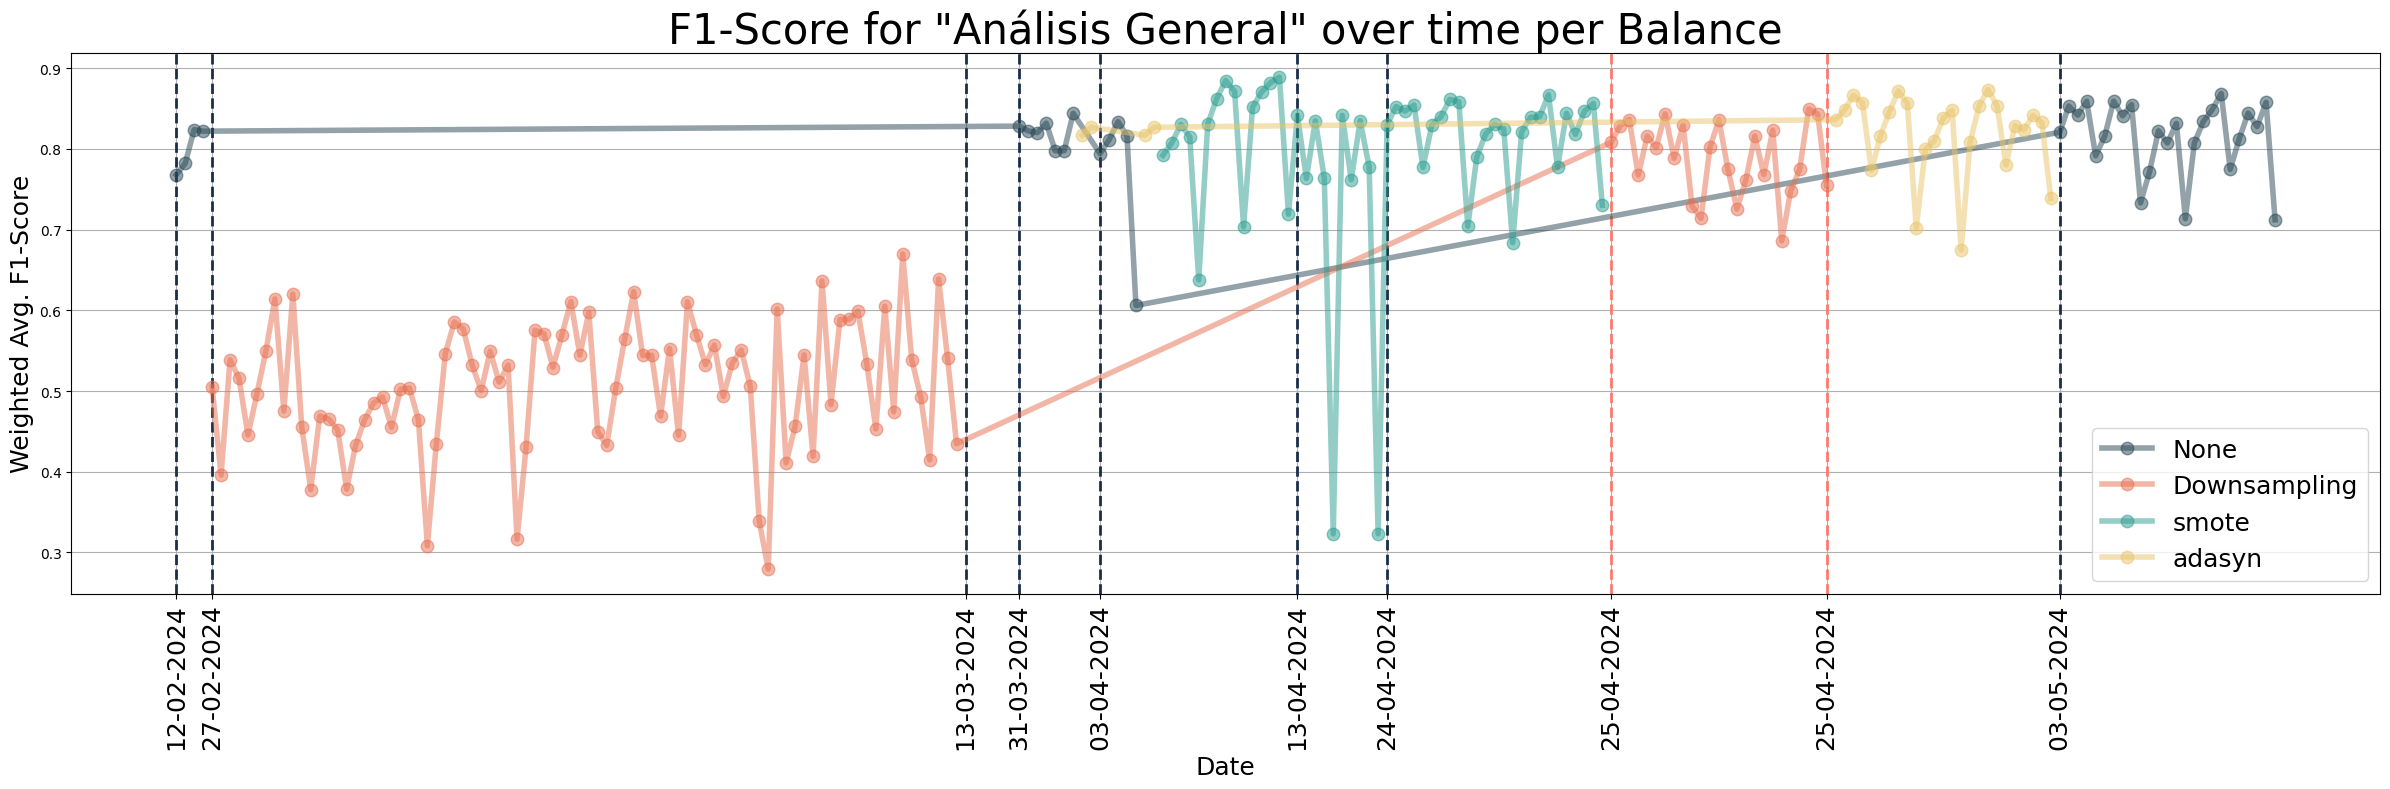

In [ ]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df[pd.isna(ageneral_df['Balance'])].index, ageneral_df[pd.isna(ageneral_df['Balance'])]['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='None')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'downsampling'].index, ageneral_df[ageneral_df['Balance'] == 'downsampling']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='Downsampling')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'smote'].index, ageneral_df[ageneral_df['Balance'] == 'smote']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='smote')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'adasyn'].index, ageneral_df[ageneral_df['Balance'] == 'adasyn']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='adasyn')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Análisis General" over time per Balance', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)







# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


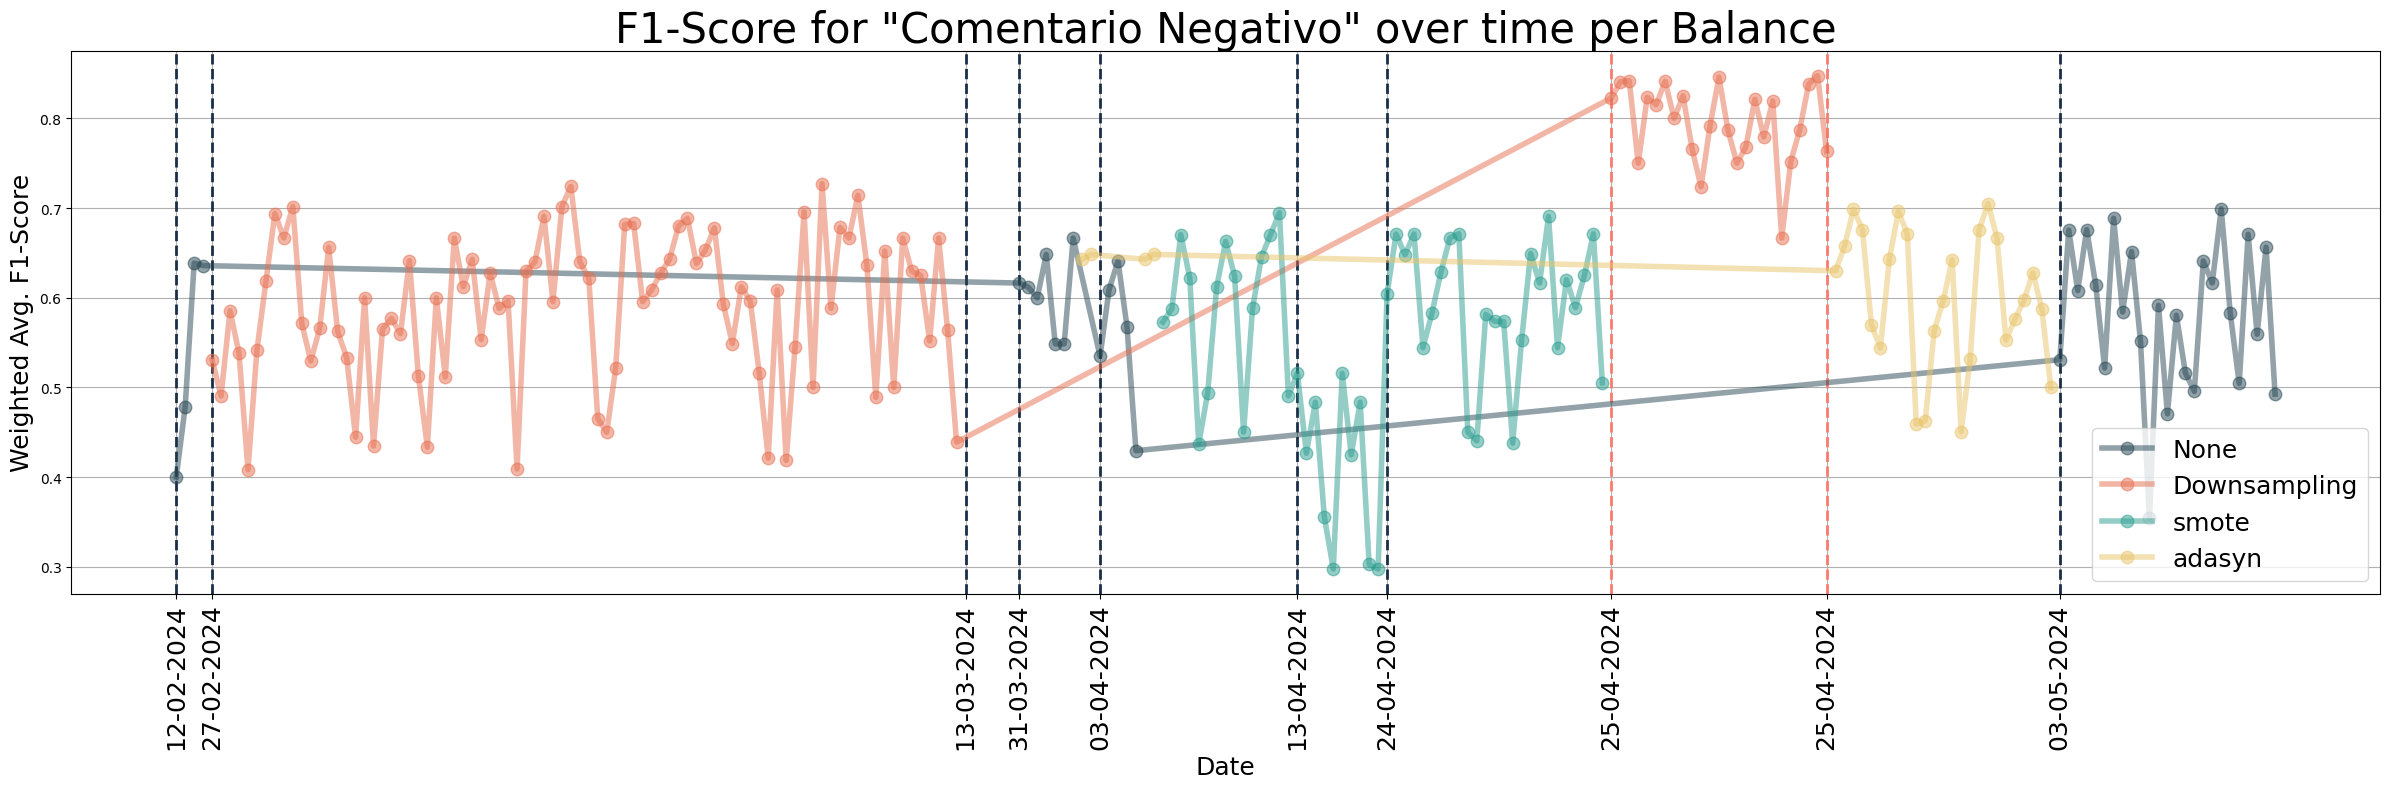

In [ ]:
from matplotlib.dates import DateFormatter


plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df[pd.isna(ageneral_df['Balance'])].index, ageneral_df[pd.isna(ageneral_df['Balance'])]['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='None')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'downsampling'].index, ageneral_df[ageneral_df['Balance'] == 'downsampling']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='Downsampling')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'smote'].index, ageneral_df[ageneral_df['Balance'] == 'smote']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='smote')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'adasyn'].index, ageneral_df[ageneral_df['Balance'] == 'adasyn']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='adasyn')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Comentario Negativo" over time per Balance', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)







# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


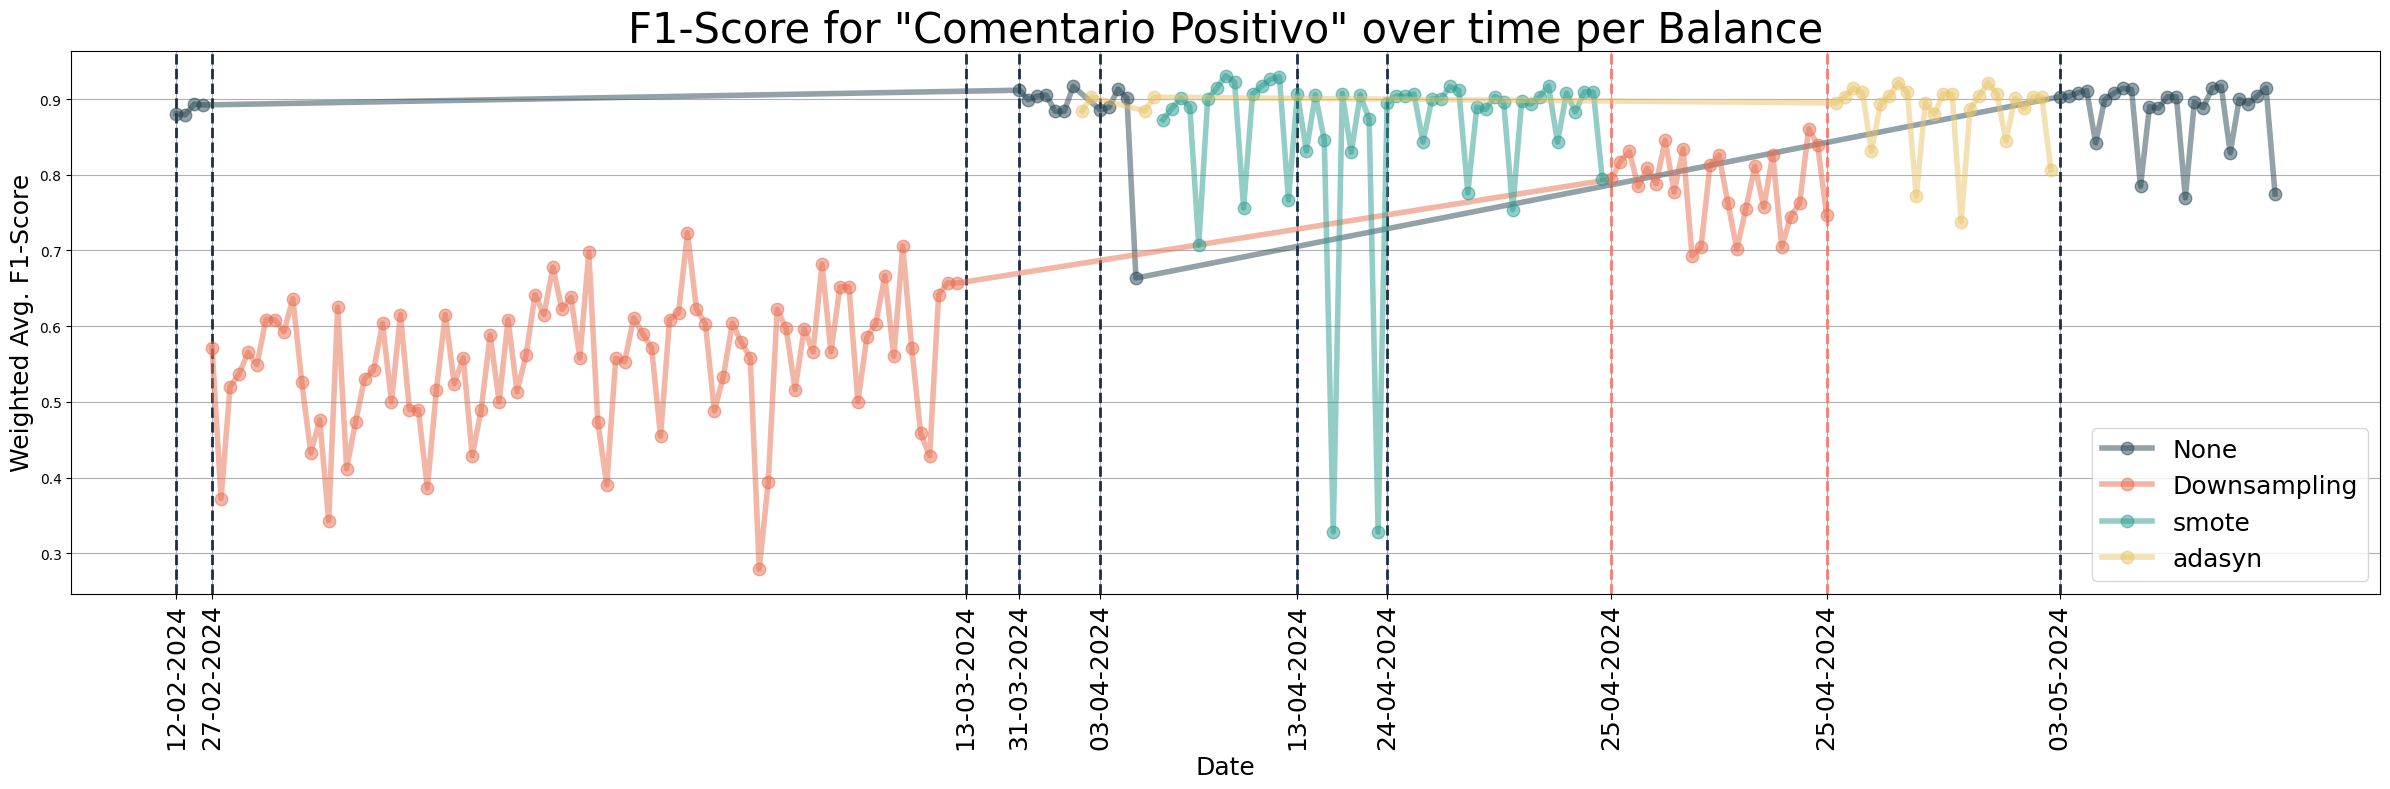

In [ ]:
from matplotlib.dates import DateFormatter


plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df[pd.isna(ageneral_df['Balance'])].index, ageneral_df[pd.isna(ageneral_df['Balance'])]['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='None')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'downsampling'].index, ageneral_df[ageneral_df['Balance'] == 'downsampling']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='Downsampling')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'smote'].index, ageneral_df[ageneral_df['Balance'] == 'smote']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='smote')
plt.plot(ageneral_df[ageneral_df['Balance'] == 'adasyn'].index, ageneral_df[ageneral_df['Balance'] == 'adasyn']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='adasyn')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Comentario Positivo" over time per Balance', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)







# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#### Embedding

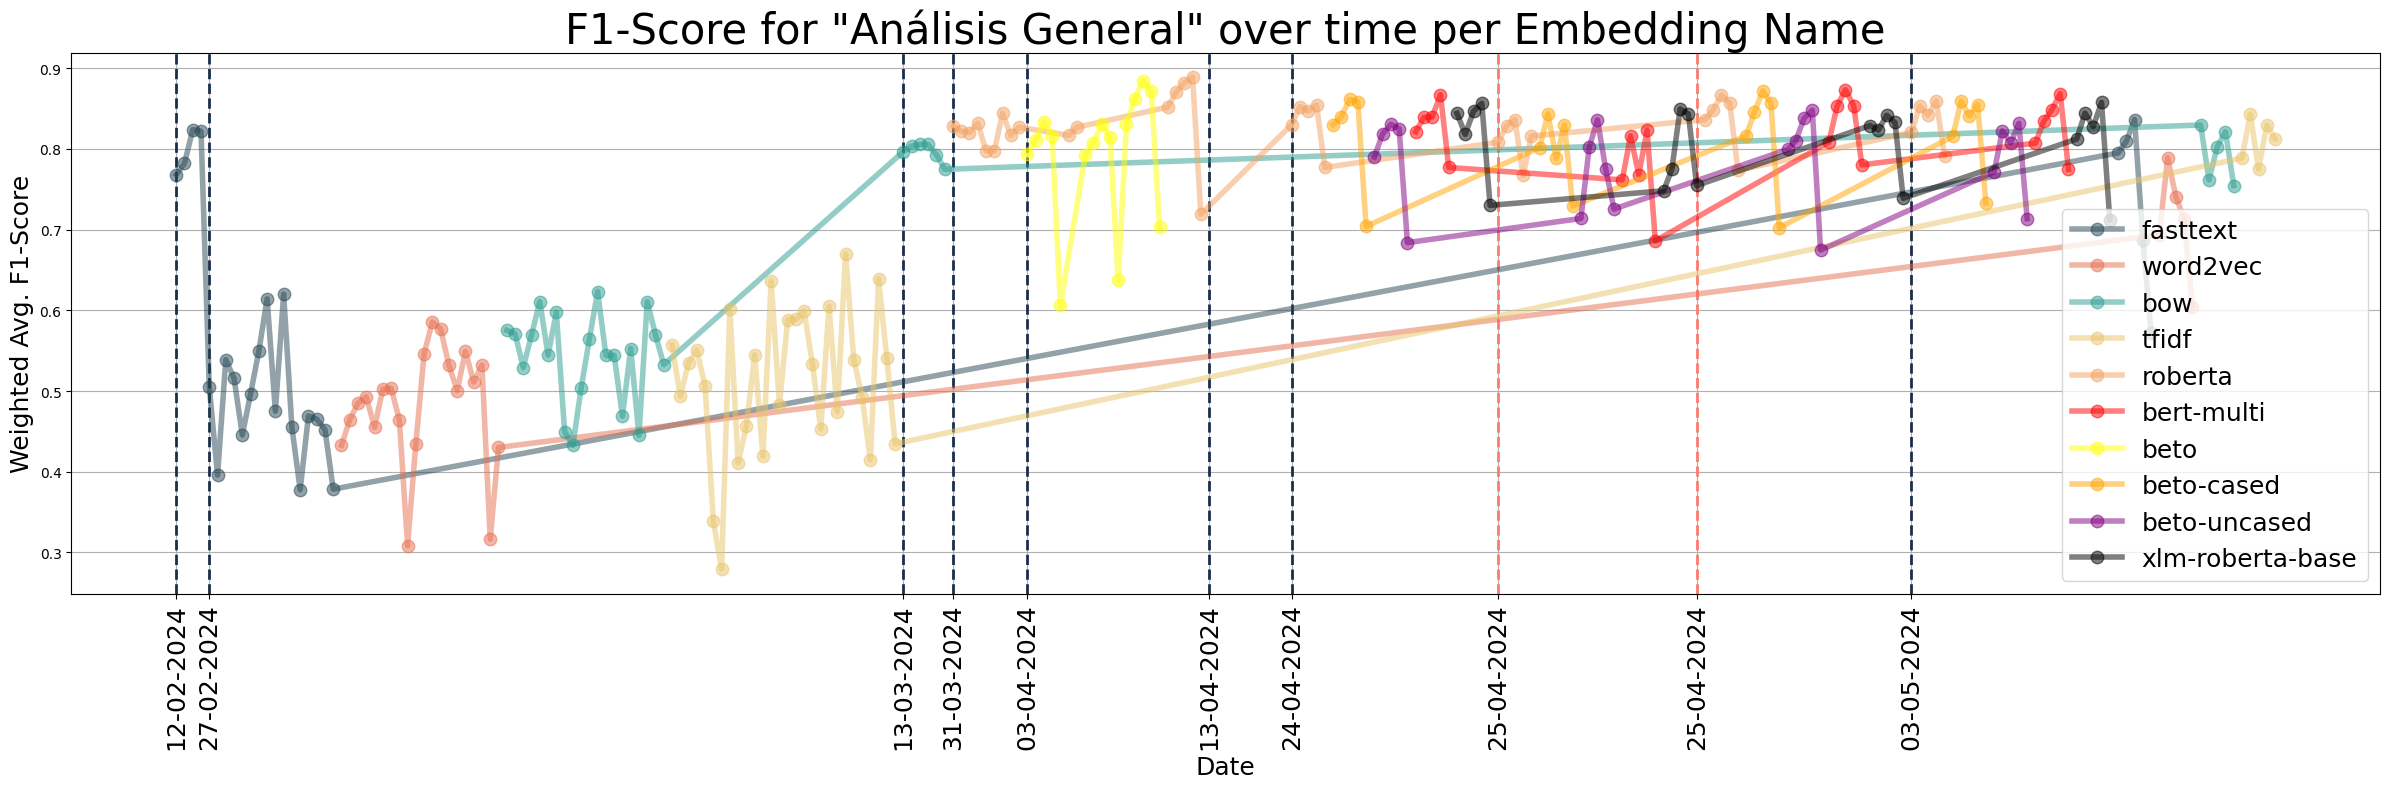

In [183]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'fasttext'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'fasttext']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='fasttext')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'word2vec'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'word2vec']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='word2vec')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'bow'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'bow']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='bow')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'tfidf'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'tfidf']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='tfidf')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'roberta'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'roberta']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#f4a261', alpha=0.5, label='roberta')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'bert-multi'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'bert-multi']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='red', alpha=0.5, label='bert-multi')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'beto'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'beto']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='yellow', alpha=0.5, label='beto')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'beto-cased'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'beto-cased']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='orange', alpha=0.5, label='beto-cased')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'beto-uncased'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'beto-uncased']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='purple', alpha=0.5, label='beto-uncased')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'xlm-roberta-base'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'xlm-roberta-base']['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='black', alpha=0.5, label='xlm-roberta-base')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Análisis General" over time per Embedding Name', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)







# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


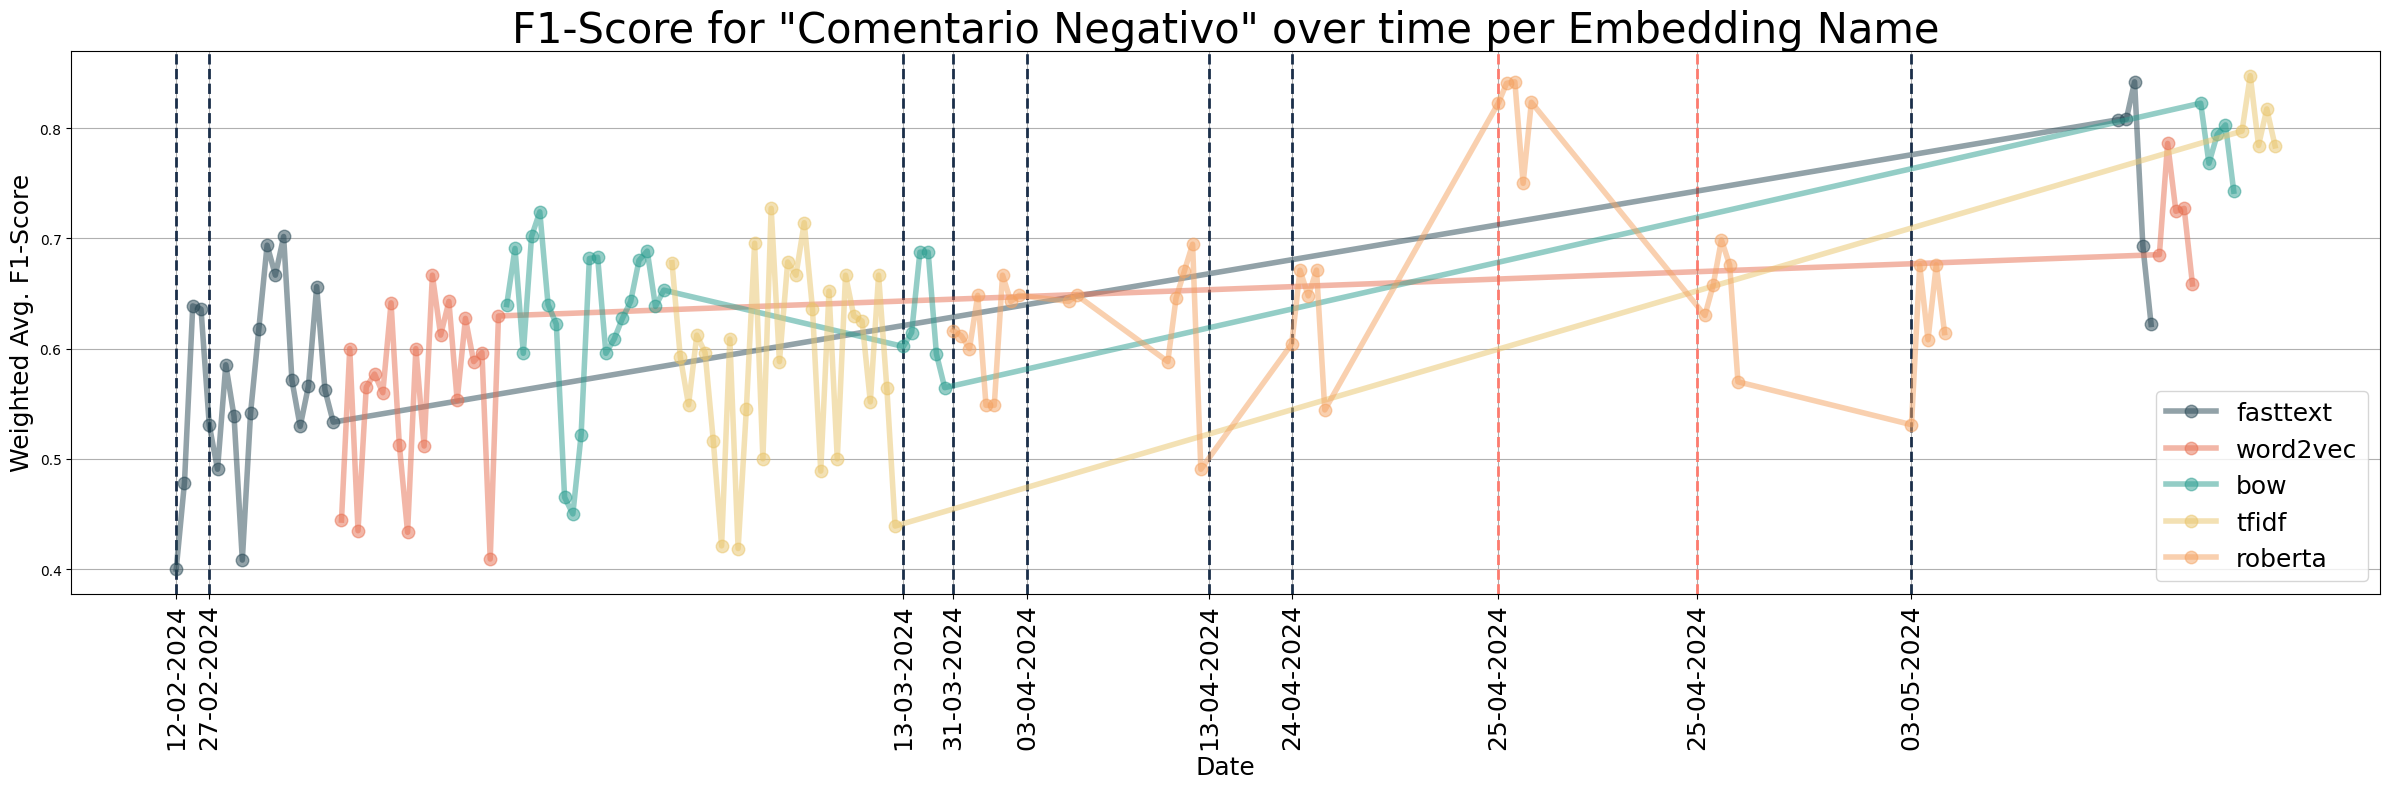

In [184]:
from matplotlib.dates import DateFormatter


plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots

plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'fasttext'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'fasttext']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='fasttext')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'word2vec'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'word2vec']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='word2vec')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'bow'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'bow']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='bow')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'tfidf'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'tfidf']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='tfidf')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'roberta'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'roberta']['Comentario Negativo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#f4a261', alpha=0.5, label='roberta')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Comentario Negativo" over time per Embedding Name', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)







# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


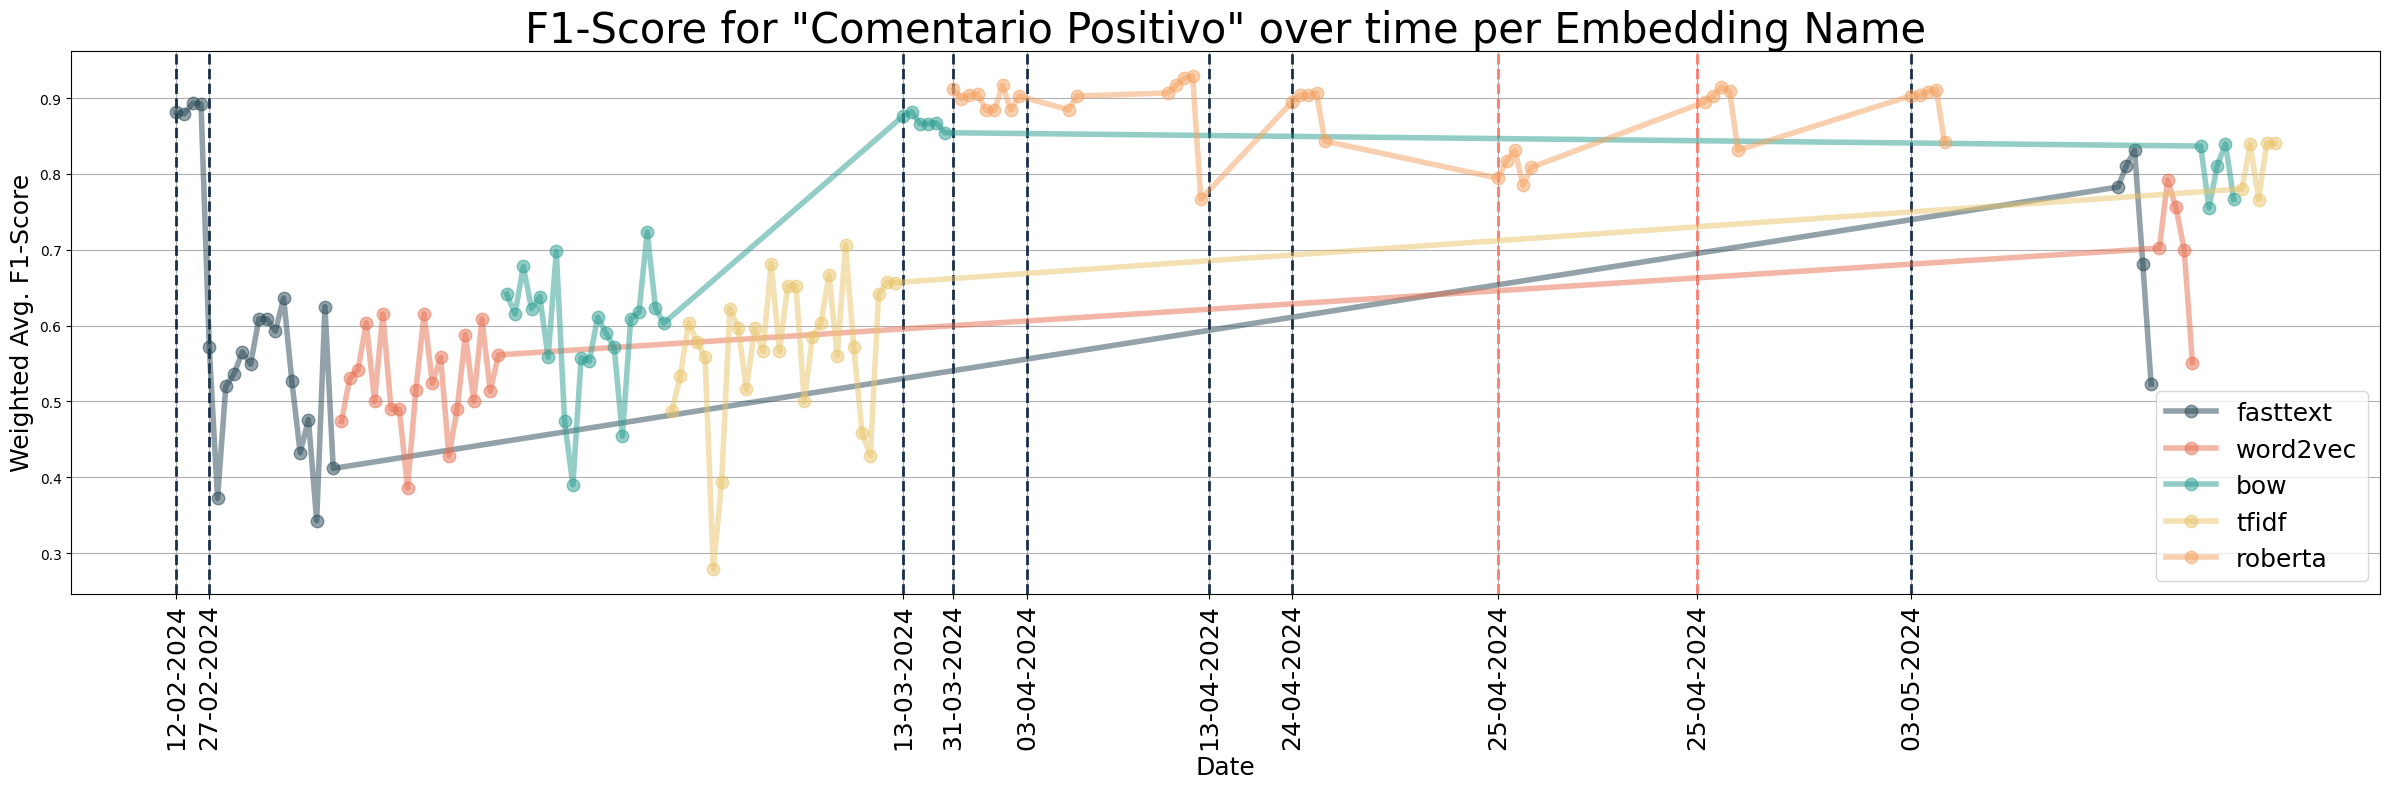

In [185]:
from matplotlib.dates import DateFormatter


plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots

plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'fasttext'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'fasttext']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='fasttext')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'word2vec'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'word2vec']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='word2vec')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'bow'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'bow']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='bow')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'tfidf'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'tfidf']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='tfidf')
plt.plot(ageneral_df[ageneral_df['Embedding_Name'] == 'roberta'].index, ageneral_df[ageneral_df['Embedding_Name'] == 'roberta']['Comentario Positivo_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#f4a261', alpha=0.5, label='roberta')


plt.legend(loc='lower right', fontsize=18)



# Setting labels and title
plt.title('F1-Score for "Comentario Positivo" over time per Embedding Name', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)







# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### Contenido Negativo

In [121]:
# Filter dataset for "Análisis General"
cnegativo_df = df[df["Type"] == "contenido_negativo"]

In [122]:
cnegativo_df.head()

,Run_ID,Data,Type,Balance,Embedding_Name,Embedding_Size,Model,Cross_Validation,Best_params,Accuracy_Global,...,Desprestigiar Deportista Autora_f1-score,Desprestigiar Deportista Autora_support,Sexualización / Objetivización_precision,Sexualización / Objetivización_recall,Sexualización / Objetivización_f1-score,Sexualización / Objetivización_support,Estereotipos de Género_precision,Estereotipos de Género_recall,Estereotipos de Género_f1-score,Estereotipos de Género_support
279,bf61634c-6c4e-48c7-9c34-a69651f02d01,data/BBDD_SeAcabo.csv,contenido_negativo,NaN,fasttext,100,random_forest,3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.425287,...,0.611765,36.0,0.000000,0.0,0.000000,2.0,0.0,0.0,0.0,1.0
280,3553871e-2472-409f-bbd0-1aeb0c764dc9,data/BBDD_SeAcabo.csv,contenido_negativo,NaN,fasttext,100,random_forest,5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.402299,...,0.590909,36.0,0.000000,0.0,0.000000,2.0,0.0,0.0,0.0,1.0
281,5e302f2c-5ec6-47de-b23a-a1effedd956a,data/BBDD_SeAcabo.csv,contenido_negativo,NaN,fasttext,100,logistic_regression,3,"{'C': 0.001, 'max_iter': 50, 'penalty': 'none'...",0.471264,...,0.566667,36.0,0.125000,0.5,0.200000,2.0,0.0,0.0,0.0,1.0
282,0ad782b2-cee5-4936-8680-18fd8f77355b,data/BBDD_SeAcabo.csv,contenido_negativo,NaN,fasttext,100,logistic_regression,5,"{'C': 100, 'max_iter': 200, 'penalty': 'l1', '...",0.471264,...,0.647887,36.0,0.142857,0.5,0.222222,2.0,0.0,0.0,0.0,1.0
283,a82d6bf5-78f3-4357-af48-a7ef065a2595,data/BBDD_SeAcabo.csv,contenido_negativo,NaN,fasttext,100,random_forest,3,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.416667,...,0.597403,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Convert 'Timestamp' column to datetime if it's not already
cnegativo_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by 'Timestamp' if needed
cnegativo_df.sort_values('Timestamp', inplace=True)

# Resetting the index to ensure it's sequential
cnegativo_df.reset_index(drop=True, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\1079866001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\1079866001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df.sort_values('Timestamp', inplace=True)


In [124]:
# Create a numerical "time" column for regression
cnegativo_df['Time'] = np.arange(len(cnegativo_df))

# Compute the regression
slope, intercept, r_value, p_value, std_err = linregress(cnegativo_df['Time'], cnegativo_df['weighted avg_f1-score'])
cnegativo_df['Trend'] = intercept + slope * cnegativo_df['Time']

C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\525121186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df['Time'] = np.arange(len(cnegativo_df))
C:\Users\jorge\AppData\Local\Temp\ipykernel_42496\525121186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnegativo_df['Trend'] = intercept + slope * cnegativo_df['Time']


In [ ]:
# List of specific dates for vertical lines
specific_dates = ['2024-02-12 17:54:34', '2024-02-27 21:00:06', '2024-03-13 09:06:22', '2024-03-31 11:31:30', '2024-04-03 12:31:11', '2024-04-13 11:48:49', '2024-04-24 19:00:45', '2024-04-25 19:00:51', '2024-04-25 22:18:27', '2024-05-03 13:46:23']
specific_dates = pd.to_datetime(specific_dates)  # Convert to datetime if not already

# Find the indices of the specific dates in the DataFrame
specific_indices = cnegativo_df[cnegativo_df['Timestamp'].isin(specific_dates)].index.tolist()
specific_indices

[0, 4, 88, 94, 103, 125, 135, 160, 184, 210]

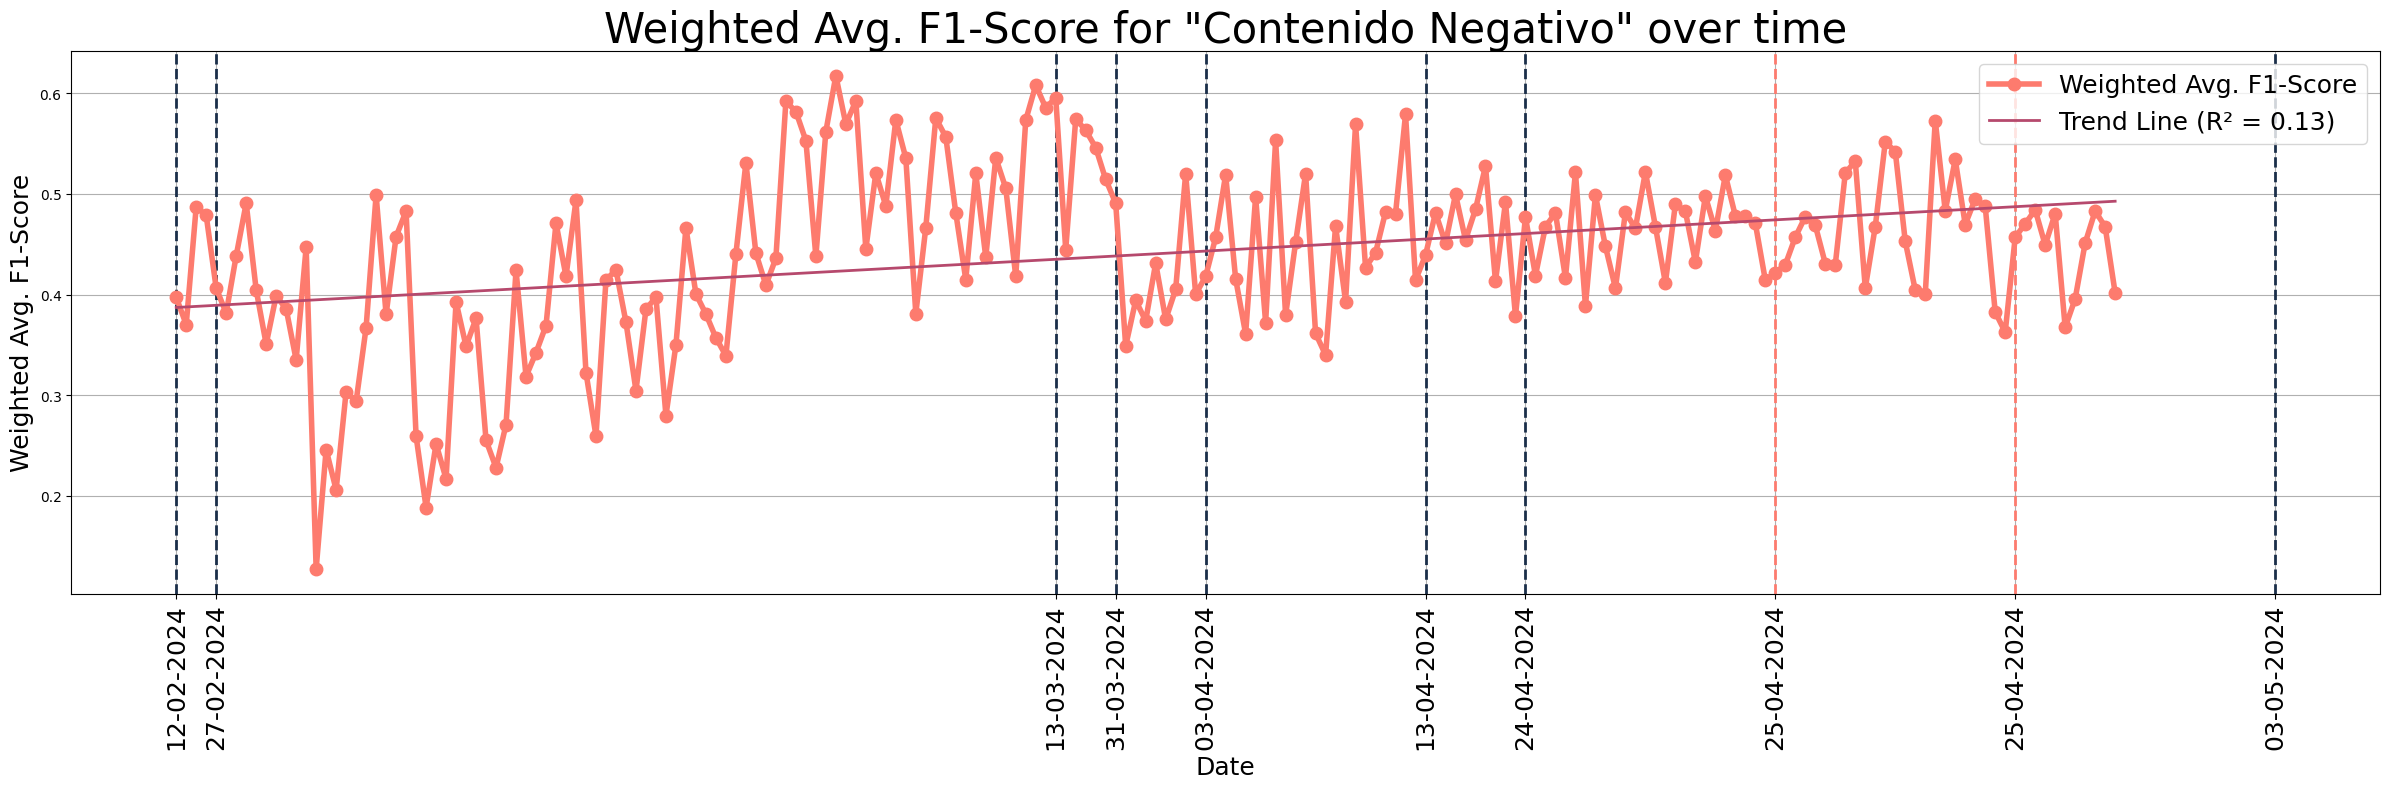

In [126]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(cnegativo_df.index, cnegativo_df['weighted avg_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#fd7b6e', label='Weighted Avg. F1-Score')


# Plotting the trend line
plt.plot(cnegativo_df.index, cnegativo_df['Trend'], linewidth=2, color='#b6496d', linestyle='-', label=f'Trend Line (R² = {r_value**2:.2f})')


plt.legend(fontsize=18)


# Setting labels and title
plt.title('Weighted Avg. F1-Score for "Contenido Negativo" over time', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)




# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


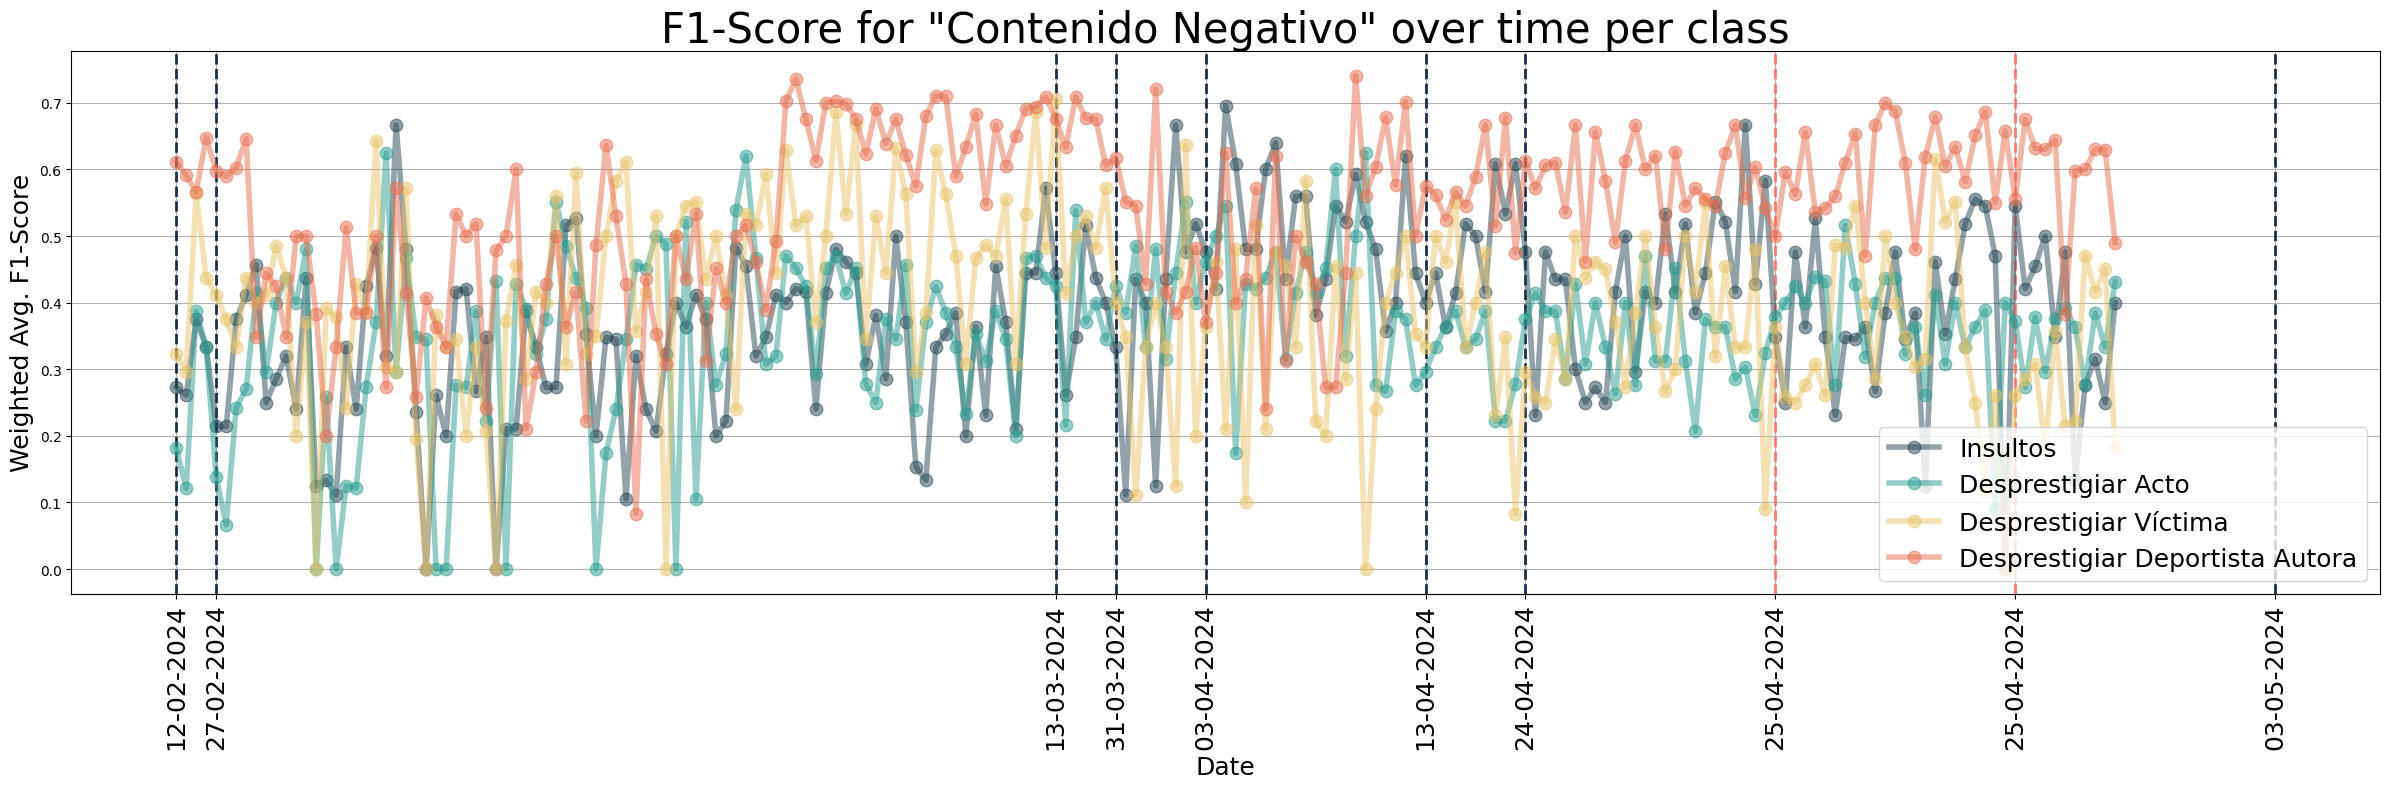

In [137]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(24, 8))



# Setting x-ticks to specific dates
plt.xticks(ticks=specific_indices, labels=[date.strftime('%d-%m-%Y') for date in specific_dates], rotation=90, fontsize=18)


# Add a vertical line for each specific index
for date, index in zip(specific_dates, specific_indices):
    if index in [160, 184]:
        plt.axvline(x=index, color='#fd7b6e', linestyle='--', linewidth=2)
    else:
        plt.axvline(x=index, color='#1a2e49', linestyle='--', linewidth=2)

# Plotting the F1-Score as dots
plt.plot(cnegativo_df.index, cnegativo_df['Insultos_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#264653', alpha=0.5, label='Insultos')
plt.plot(cnegativo_df.index, cnegativo_df['Desprestigiar Acto_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#2a9d8f', alpha=0.5, label='Desprestigiar Acto')
plt.plot(cnegativo_df.index, cnegativo_df['Desprestigiar Víctima_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e9c46a', alpha=0.5, label='Desprestigiar Víctima')
plt.plot(cnegativo_df.index, cnegativo_df['Desprestigiar Deportista Autora_f1-score'], linewidth=4, linestyle='-', marker='o', markersize=9, color='#e76f51', alpha=0.5, label='Desprestigiar Deportista Autora')

plt.legend(loc='lower right', fontsize=18)


# Setting labels and title
plt.title('F1-Score for "Contenido Negativo" over time per class', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Weighted Avg. F1-Score', fontsize=18)




# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
